# Recurrent Neural Network

Here, I created a dataset with group of inputs of some size (between 10 and 50) - Similar to this [example](https://colab.research.google.com/drive/1tj0DRWxVvRC7_b7ubQ46zJo4ZuxT4jbW?authuser=1) 

I also divided the data into train and test and used LSTM model.

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2024-06-17 20:15:05--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 173.194.193.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-06-17 20:15:05 ERROR 404: Not Found.

--2024-06-17 20:15:05--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 173.194.193.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-06-17 20:15:05 ERROR 404: Not Found.



In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import math
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
#mount google drive to colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#set working directory to my GoogleDrive

wd = '/content/drive/My Drive/Data_Science_Machine_Learning/Practical_Machine_Learning/data'

In [5]:
#print the current working directory
%pwd

'/content'

In [6]:
%cd $wd

/content/drive/My Drive/Data_Science_Machine_Learning/Practical_Machine_Learning/data


In [8]:
#list all files in my working directory
!ls

daily-min-temperatures.csv  Sunspots.csv


In [67]:
  #load the 'Sunspots.csv' file in my working directory

  df = pd.read_csv('Sunspots.csv')
  df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [68]:
#print the start and end date of the data

print(df['Date'].min())
print(df['Date'].max())

1749-01-31
2021-01-31


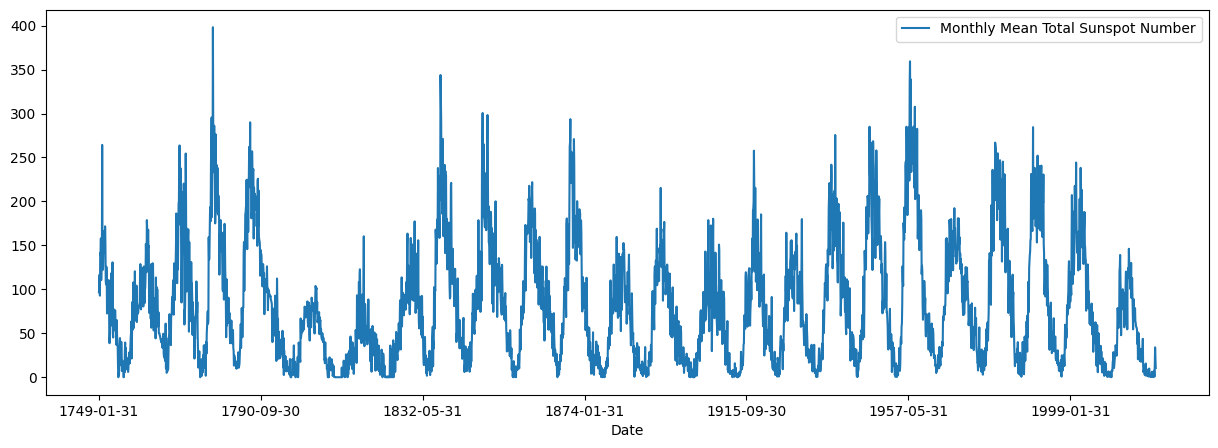

In [69]:
  #plot the montly mean total sunspot number to see the variation by "Date"

  df.plot(x='Date', y='Monthly Mean Total Sunspot Number', figsize=(15, 5))
  plt.show()


In [70]:
# Preprocess the data
sun_df = df['Monthly Mean Total Sunspot Number'].values
sun_df = sun_df.reshape(-1, 1)


In [71]:
# Normalize the data
scaler = MinMaxScaler()
sun_df = scaler.fit_transform(sun_df)

In [72]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [73]:
  #Here, I will create a loop to use different sequence lengths and evaluate the model performance on each of them

  seq_lengths = [10, 20, 30, 50]
  results = {}
  histories = {}
  metrics = {}

  for seq_length in seq_lengths:
      # Create sequences
      X, y = create_sequences(sun_df, seq_length)

      # Split the data into train and test
      X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      # Further split the training data into train and validation sets
      X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

      # Build the RNN (LSTM) model
      input_dim = X_train.shape[2]

      model = tf.keras.Sequential([
          tf.keras.layers.LSTM(50, input_shape=(seq_length, input_dim)),
          tf.keras.layers.Dense(1)
      ])

      model.compile(optimizer='adam', loss='mse')

      # Train the model
      early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

      history = model.fit(
          X_train, y_train,
          epochs=50,
          validation_data=(X_val, y_val),
          callbacks=[early_stopping]
      )

      # Evaluate the model
      loss = model.evaluate(X_test, y_test)
      results[seq_length] = loss
      histories[seq_length] = history.history

      # Predict
      predictions = model.predict(X_test)
      predictions = scaler.inverse_transform(predictions)
      y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

      # Calculate metrics
      mse = mean_squared_error(y_test_actual, predictions)
      mae = mean_absolute_error(y_test_actual, predictions)
      r2 = r2_score(y_test_actual, predictions)

      metrics[seq_length] = {
          'mse': mse,
          'mae': mae,
          'r2': r2,
          'actual': y_test_actual,
          'predicted': predictions
      }



Epoch 1/50
66/66 [==============================] - 2s 13ms/step - loss: 0.0175 - val_loss: 0.0062
Epoch 2/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 3/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 4/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 5/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 6/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 7/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 8/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 11/50
66/66 

In [74]:
  # results for different sequence lengths
  for seq_length, loss in results.items():
      print(f'Sequence Length: {seq_length}, Test Loss: {loss}')


Sequence Length: 10, Test Loss: 0.003951865714043379
Sequence Length: 20, Test Loss: 0.0035225709434598684
Sequence Length: 30, Test Loss: 0.0036749530117958784
Sequence Length: 50, Test Loss: 0.0044827754609286785


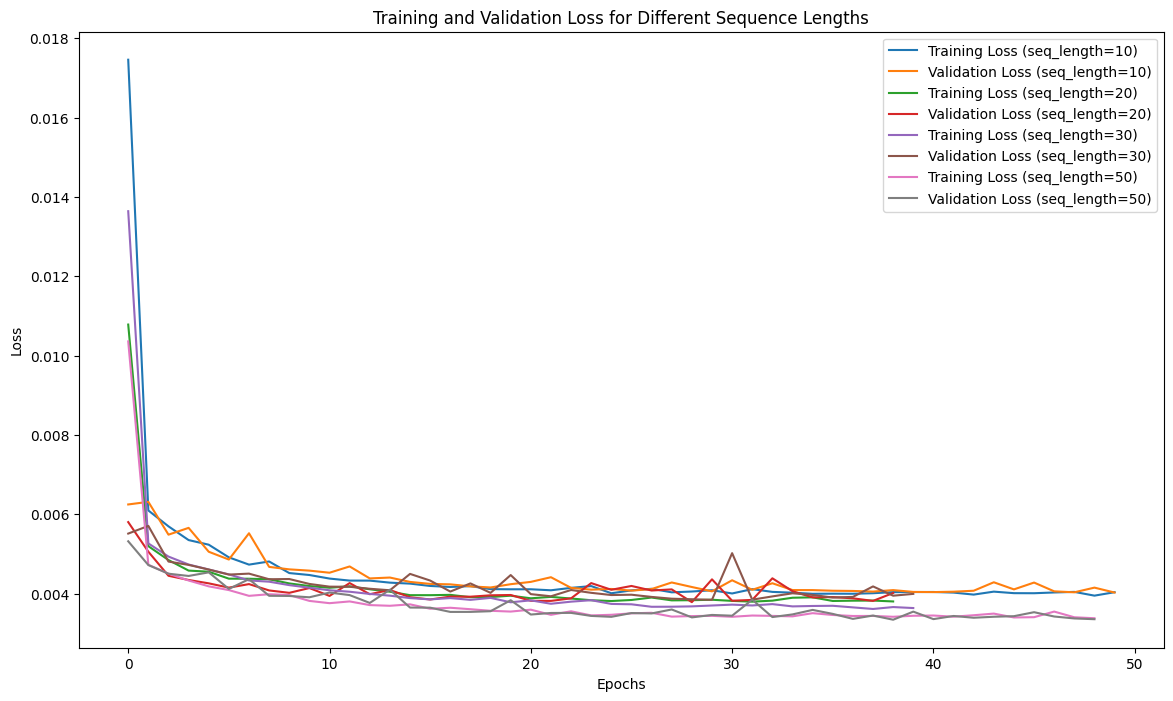

In [75]:
  # Plot training and validation loss for each sequence length
  plt.figure(figsize=(14, 8))
  for seq_length, history in histories.items():
      plt.plot(history['loss'], label=f'Training Loss (seq_length={seq_length})')
      plt.plot(history['val_loss'], label=f'Validation Loss (seq_length={seq_length})')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss for Different Sequence Lengths')
  plt.show()


Sequence Length: 10
Mean Squared Error (MSE): 626.6205797943568
Mean Absolute Error (MAE): 18.029944209129578
R-squared: 0.8605066650511499


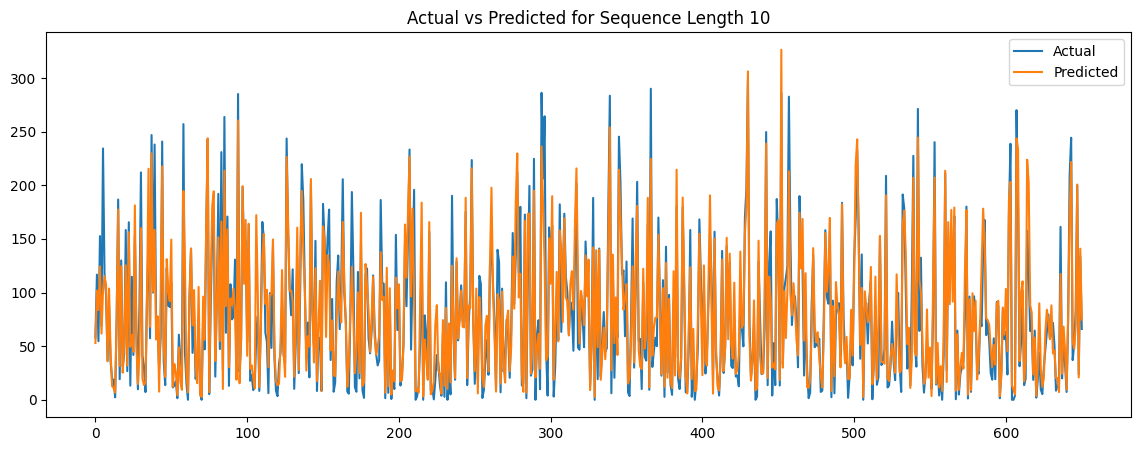


Sequence Length: 20
Mean Squared Error (MSE): 558.550163415232
Mean Absolute Error (MAE): 17.50962520982892
R-squared: 0.8796624855584849


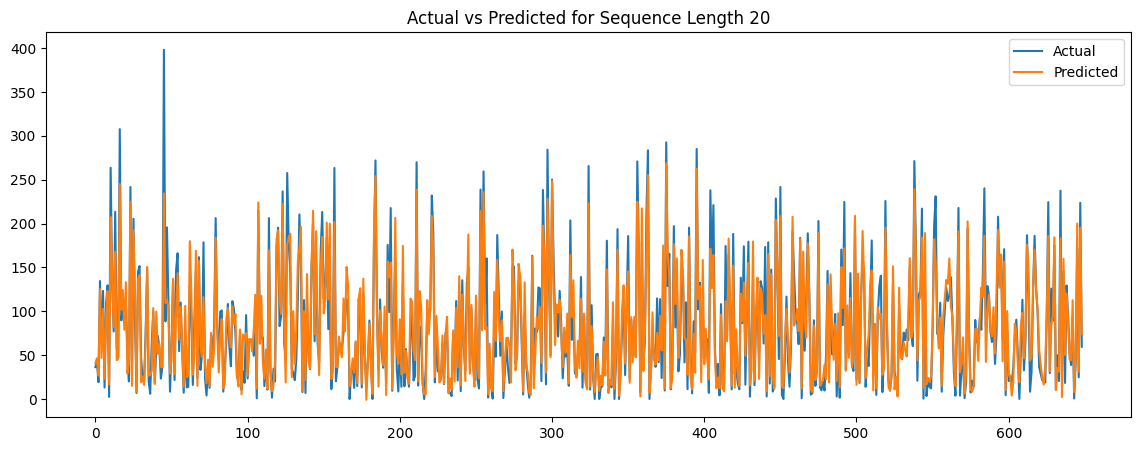


Sequence Length: 30
Mean Squared Error (MSE): 582.7124059575295
Mean Absolute Error (MAE): 16.993863214481006
R-squared: 0.8811262384965088


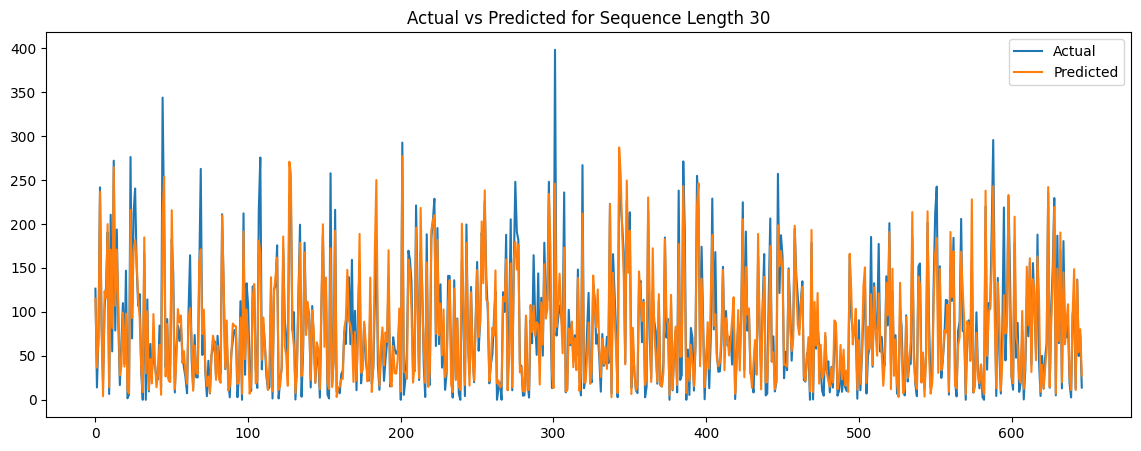


Sequence Length: 50
Mean Squared Error (MSE): 710.8033474882773
Mean Absolute Error (MAE): 18.98638856785479
R-squared: 0.8599063553007961


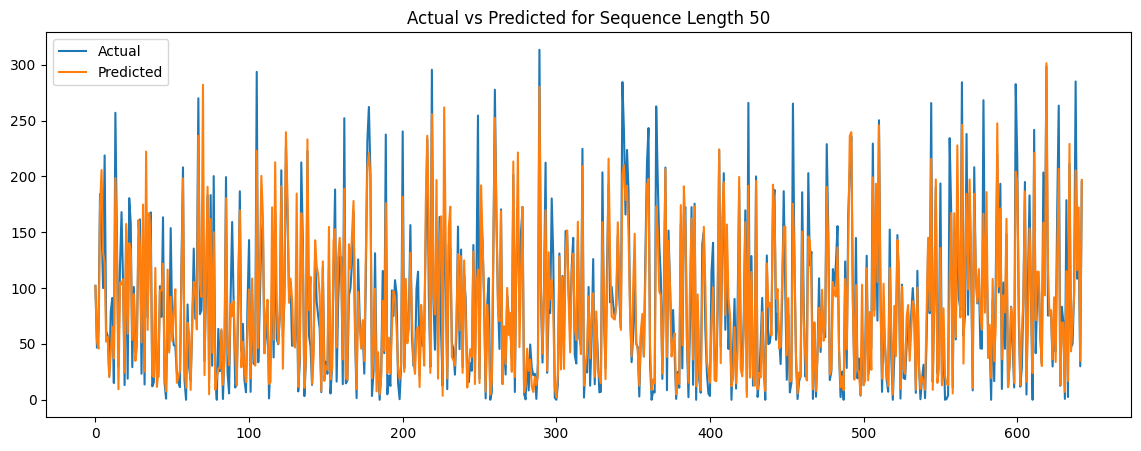

In [77]:
  # Evaluate the model, make predictions, calculate mse, mae, and r2
  for seq_length, metric in metrics.items():
      print(f'\nSequence Length: {seq_length}')
      print(f'Mean Squared Error (MSE): {metric["mse"]}')
      print(f'Mean Absolute Error (MAE): {metric["mae"]}')
      print(f'R-squared: {metric["r2"]}')

      plt.figure(figsize=(14, 5))
      plt.plot(metric['actual'], label='Actual')
      plt.plot(metric['predicted'], label='Predicted')
      plt.legend()
      plt.title(f'Actual vs Predicted for Sequence Length {seq_length}')
      plt.show()